Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, do not change the filename of this notebook.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercises Lecture 6

In [2]:
# imports

import numpy as np

## Exercise 6.1: (4 points)

(a) Write a program to evaluate the integral in Equation $I=\int_0^2sin^2\big[\frac{1}{x(2-x)}\big]dx$ using the Monte Carlo Integration method with $10\,000$ points.
  Also evaluate the error on your estimate.
  
(b) Now estimate the integral again using the mean value method with
  $10\,000$ points.  Also evaluate the error.

You should find that the error is somewhat smaller using the mean value
method.

In [19]:
def mc_integration(n):
    """
    derive Monte Carlo integral of the function
    Args:
        n (int): number of points
    Returns:
        float: the integral value
        float: the error on the estimate
    """
    integral = 0  # the integral value
    err = 0
    # recall form the lecture that the area is bounded
    # 2 units in x and 1 unit in y, from the plot of the function.
    # YOUR CODE HERE
    
    area = 2
    x = np.random.uniform(0, 2, n)  # N random points in range [0, 2] dran from the uniform distribution
    y = np.random.uniform(0, 1, n)  # N random points in range [0, 1] dran from the uniform distribution
    fx = np.sin(1/(x*(2-x)))**2     # The actual values for the data points
    
    # Calculate the Monte Carlo integral
    under_zero = np.count_nonzero(y < fx)
    integral = area*under_zero/n
    
    # Calculate the standard deviation sigma
    err = np.sqrt(integral*(area-integral))/np.sqrt(n)
    
    #raise NotImplementedError()
    
    return integral, err

def mvt_integration(n):
    """derive Mean Value integral of the function
    Args:
        n (int): number of points
    Returns:
        float: the integral value
        float: the error on the estimate"""
    integral = 0  # the integral value
    err = 0
    # recall form the lecture that the area is bounded
    # 2 units in x and 1 unit in y, from the plot of the function.
    # YOUR CODE HERE
    
    area = 2
    x = np.random.uniform(0, 2, n)  # N random points in range [0, 2] dran from the uniform distribution
    fx = np.sin(1/(x*(2-x)))**2
    
    # Calculate the mean value <f(x)> and the integral I = (b - a)<f(x)>
    mean_value = np.sum(fx)/n
    integral = 2*mean_value
    
    # Calculate the standard deviation
    err = np.sqrt(integral*(area-integral))/np.sqrt(n)
    
    #raise NotImplementedError()
    
    return integral, err 

In [20]:
# validation
mc_I, mc_E = mc_integration(10000)
print('Integral through Monte Carlo method: {} +-{}'
      ''.format(mc_I, mc_E))
assert abs(mc_I - 1.4514) < 3e-2, 'Monte Carlo integral bad'

Integral through Monte Carlo method: 1.4548 +-0.008905935997973487


In [21]:
mvt_I, mvt_E = mvt_integration(10000)
print('Integral through mean value method: {} +-{}'
      ''.format(mvt_I, mvt_E))
assert abs(mvt_I - 1.4514) < 3e-2, 'Mean value integral bad'
assert mvt_E < mc_E, 'MVT error should be less than MC error'

Integral through mean value method: 1.4560663882513822 +-0.008899457564971808


## Exercise 6.2: Volume of a hypersphere (4 point)

This exercise asks you to estimate
the volume of a sphere of unit radius in ten dimensions using a Monte Carlo
method.  Consider the equivalent problem in two dimensions, the area of a
circle of unit radius:

<img src="circle.png" width="250" />

The area of the circle, the shaded area above, is given by the integral

$$\begin{equation}
I = \iint_{-1}^{+1} f(x,y) \>d x\,d y,
\end{equation}$$

where $f(x,y)=1$ everywhere inside the circle and zero everywhere outside.
In other words,

$$\begin{equation}
f(x,y) = \biggl\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $x^2+y^2\le1$,} \\
           0 &\qquad\mbox{otherwise.}
         \end{array}
\end{equation}$$

So if we didn't already know the area of the circle, we could calculate it
by Monte Carlo integration.  We would generate a set of $N$ random points
$(x,y)$, where both $x$ and $y$ are in the range from $-1$ to~1.  Then the
two-dimensional version of Equation $I \simeq \frac{V}{N}\sum^N_{i=1}f(\textbf{r}_i)$ (from Lecture 6) for this calculation would be

$$\begin{equation}
I \simeq {4\over N} \sum_{i=1}^N f(x_i,y_i).
\end{equation}$$

Generalize this method to the ten-dimensional case and write a program to
perform a Monte Carlo calculation of the volume of a sphere of unit radius
in ten dimensions.

If we had to do a ten-dimensional integral the traditional way, it would
take a very long time.  Even with only 100 points along each axis (which
wouldn't give a very accurate result) we'd still have $100^{10} = 10^{20}$
points to sample, which is impossible on any computer.  But using the Monte
Carlo method we can get a pretty good result with a million points or so.

In [22]:
def mc_sphere(n, dim):
    """
    Monte Carlo volume of multi-dimensional unit sphere
    Args:
        n (int): number of points
        dim (int): dimensions of the unit sphere
    Returns:
        float: the volume of the unit sphere
    """
    vol = 0 # volume of the sphere
    
    # YOUR CODE HERE
    
    x = np.random.uniform(-1, 1, size=(dim, n))  # n random points in 10 dimensions in range [0, 1]
    fx = np.sqrt(np.sum(np.square(x), axis=0))   # Calculate f(r_i) = sqrt(x_1,i^2 + x_2,i^2 + ... + x_10,i^2) for each point
    
    # Get the points that inside the sphere
    inside_sphere = (fx <= 1)
    
    # Assign value 1 for points inside the sphere, and 0 to the points outside the sphere
    fx = np.zeros_like(fx)
    fx[inside_sphere] = 1
    
    # Calculate the mean value and the integral V/N sum(fx), where V = 2^dim
    vol = 2**dim/n*np.sum(fx)
    
    #raise NotImplementedError()
    
    return vol

In [23]:
# validation
vol = mc_sphere(500000, 10)
print('Volume of 10 dimensional sphere: {}'.format(vol))
assert abs(vol - 2.55016) < 5e-1, 'bad volume' 

Volume of 10 dimensional sphere: 2.646016


## Exercise 6.3: (4 points)

Calculate a value for the integral

$$\begin{equation}
I = \int_0^1 {x^{-1/2}\over e^x + 1}\>d x,
\end{equation}$$

using the importance sampling formula, Equation $I \simeq \frac{1}{N}\sum_{i=1}^N\frac{f(x_i)}{w(x_i)}\int_a^bw(x)dx$ (from lecture 6), with $w(x)=x^{-1/2}$,
as follows.

(a) Show that the probability distribution $p(x)$ from which the sample
  points should be drawn is given by
  
$$\begin{equation}
p(x) = {1\over2\sqrt{x}}
\end{equation}$$

and derive a transformation formula for generating random numbers between
zero and one from this distribution.

### Solution (Double click to edit)

The probability density function is given by $$p(x) = \frac{w(x)}{\int_a^b w(x) dx} = \frac{x^{-1/2}}{\int_0^1 x^{-1/2} dx}$$
where $$\int_0^1 x^{-1/2} dx = 2 x^{1/2} \bigg|_0^1 = 2$$
Substituting this gives $$p(x) = \frac{x^{-1/2}}{2} = \frac{1}{2\sqrt{x}}$$

The transformation formula gives $$z = \int_0^x p(x) dx = \int_0^x \frac{1}{2 \sqrt{x}} dx = \frac{1}{2} 2 x^{1/2} \bigg|_0^x = \sqrt{x}$$
so $$x = z^2$$

(b) Using your formula, sample $N=1,000,000$ random points and hence
  evaluate the integral.  You should get a value around $0.84$.

In [24]:
def imp_integral(n):
    """Calculate integral with importance sampling
    Args:
        n (int): number of points
    Returns:
        float: integral of the function"""
    integral = 0
    
    # YOUR CODE HERE
    
    z = np.random.uniform(0, 1, n)  # n random points between 0 and 1
    x = z*z                         # Transform the points to the distribution p(x)
    
    # Since the integral of w(x) from 0 to 1 is 2, and f(x)/w(x) = exp(x) + 1, the integral becomes
    integral = np.sum(1/(np.exp(x)+1))*2/n
    
    #raise NotImplementedError()
    
    return integral

In [25]:
# validation
integral = imp_integral(1000000)
print('Integral through importance sampling: {}'
      ''.format(integral))
assert abs(integral - 0.84) < 5e-2, 'bad integral value'

Integral through importance sampling: 0.8390107291601904


## Exercise 6.4: The Ising model (8 points)

The Ising model is a theoretical
model of a magnet.  The magnetization of a magnetic material is made up of
the combination of many small magnetic dipoles spread throughout the
material.  If these dipoles point in random directions then the overall
magnetization of the system will be close to zero, but if they line up so
that all or most of them point in the same direction then the system can
acquire a macroscopic magnetic moment---it becomes magnetized.  The Ising
model is a model of this process in which the individual moments are
represented by dipoles or "spins" arranged on a grid or lattice: 

<img src="spins.png" width="250" />

In this case we are using a square lattice in two dimensions, although the
model can be defined in principle for any lattice in any number of
dimensions.

The spins themselves, in this simple model, are restricted to point in only
two directions, up and down.  Mathematically the spins are represented by
variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can
typically point in any spatial direction, not just up or down, but the
Ising model, with its restriction to just the two directions, captures a
lot of the important physics while being significantly simpler to
understand.

Another important feature of many magnetic materials is that the individual
dipoles in the material may interact magnetically in such a way that it is
energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is
proportional to their dot product, but in the Ising model this simplifies
to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice,
since the spins are one-dimensional scalars, not vectors.  Then the actual
energy of interaction is $-Js_is_j$, where $J$ is a positive interaction
constant.  The minus sign ensures that the interactions are
*ferromagnetic*, meaning the energy is lower when dipoles are
lined up.  A ferromagnetic interaction implies that the material will
magnetize if given the chance.  (In some materials the interaction has the
opposite sign so that the dipoles prefer to be antialigned.  Such a
material is said to be *antiferromagnetic*, but we will not
look at the antiferromagnetic case here.)

Normally it is assumed that spins interact only with those that are
immediately adjacent to them on the lattice, which gives a total energy for
the entire system equal to

$$\begin{equation}
E = -J \sum_{\langle{ij}\rangle} s_i s_j\,,
\end{equation}$$

where the notation $\langle{ij}\rangle$ indicates a sum over pairs $i,j$ that are
adjacent on the lattice.  On the square lattice we use in this exercise
each spin has four adjacent neighbors with which it interacts.

Write a program to perform a Markov chain Monte Carlo simulation of
the Ising model on the square lattice for a system of $20\times20$ spins.
You will need to set up variables to hold the value $\pm1$ of the spin on
each lattice site, probably using a two-dimensional integer array, and then
take the following steps.

(a) First write a function to calculate the total energy of the system,
  as given by the equation above.  That is, for a given array of values of
  the spins, go through every pair of adjacent spins and add up the
  contributions $s_is_j$ from all of them, then multiply by $-J$.  Hint 1:
  Each unique pair of adjacent spins crops up only once in the sum.  Thus
  there is a term $-Js_1 s_2$ if spins 1 and 2 are adjacent to one another,
  but you do not also need a term $-Js_2 s_1$.  Hint 2: To make your final
  program to run in a reasonable amount of time, you will find it helpful
  if you can work out a way to calculate the energy using Numpy's ability
  to do arithmetic with entire arrays at once.  If you do the calculation
  step by step, your program will be significantly slower.

In [44]:
def ising_energy(array, J):
    """Calculates ising energy for array
    Args:
        array (nd array): 2D array with representing ising field
        J (float): interaction constant
    Returns:
        float: ising energy"""
    energy = 0  # energy (units)
    
    # YOUR CODE HERE
    
    energy -= J * np.sum([array[i,:]*array[i+1,:] + array[:,i]*array[:,i+1] for i in range(len(array)-1)])
    
    #raise NotImplementedError()
    
    return energy

In [45]:
# validate
array = np.array([[ 1,  1, -1,  1],
                  [ 1, -1, -1,  1],
                  [-1,  1,  1, -1],
                  [ 1, -1,  1,  1]])
energy = ising_energy(array, 1)
assert energy == 8, 'bad energy'
# wall time check
import time
# random large ising field
array = np.random.randint(0, 2, (1000, 1000)) * 2 - 1
t0 = time.time()
energy = ising_energy(array, 1)
wall_time = time.time() - t0
print('wall time for 1000x1000 field: {} s'.format(wall_time))
assert wall_time < 5e-2, ('needs further optimising, bring wall time below 0.05 s')

wall time for 1000x1000 field: 0.025481462478637695 s


  
(b) Now use your function as the basis for a Metropolis-style simulation
  of the Ising model with $J=1$ and temperature $T=1$ in units where the
  Boltzmann constant $k_B$ is also~$1$.  Initially set the spin variables
  randomly to $\pm1$, so that on average about a half of them are up and a
  half down, giving a total magnetization of roughly zero.  Then choose a
  spin at random, flip it, and calculate the new energy after it is
  flipped, and hence also the change in energy as a result of the flip.
  Then decide whether to accept the flip using the Metropolis acceptance
  formula, 
  
  $$ P_A = 
\begin{cases}
1 & \text{if} E_j \leq E_i \\
e^{-\beta(E_j-E_i)} & \text{if} E_j \gt E_i \\
\end{cases}
$$
  
  from lecture 6.

In [81]:
def flip(array, flip_ind, j=1, kbt=10):
    """flips a spin if accepted using metropolis formula
    Args:
        array (nd array): the ising field
        flip_ind (list): index (as a list [x, y]) to be flipped
        j (float): interaction energy
        kbt (float): k_b * T
    Returns:
        nd array: the ising field with flipped spin, if accepted, or
            the same field otherwise."""
    # YOUR CODE HERE
    if array is None:
        array = np.random.choice([-1, 1], size=(20, 20))
    if flip_ind is None:
        flip_ind = np.random.randint(len(array), size=2)
    
    
    Ei = ising_energy(array, j)  # energy before the flip
    array[flip_ind[1], flip_ind[0]] *= -1  # do the flip
    Ej = ising_energy(array, j)  # energy after the flip
    
    if Ei < Ej:  # energy increases
        if np.random.rand() < np.exp(-1/kbt * (Ej-Ei)):
            pass  # accept the flip
        else:
            array[flip_ind[1], flip_ind[0]] *= -1  # reject the flip
    #raise NotImplementedError()
    
    return array

# initialise random array with zero magnetisation.
array = None
# choose an index, [x, y], at random
random_index = None
# get flipped array if it is flipped
array = flip(array, random_index, j=1, kbt=1)

In [82]:
# validation
array = np.array([[ 1,  1, -1,  1],
                  [ 1, -1, -1,  1],
                  [-1,  1,  1, -1],
                  [ 1, -1, -1,  1]])
array = flip(array, [2, 2], j=1, kbt=10)
assert array[2, 2] == -1, "should flip"
array = flip(array, [2, 2], j=1, kbt=1e-9)
assert array[2, 2] == -1, "shouldn't flip"

(c) Now repeat the above process for many moves. Make a plot of the total magnetization $M=\sum_i s_i$ of the system
  as a function of time for a million Monte Carlo steps.  You should see
  that the system develops a "spontaneous magnetization," a nonzero value
  of the overall magnetization.  Hint: While you are working on your
  program, do shorter runs, of maybe ten thousand steps at a time.  Once
  you have it working properly, do a longer run of a million steps to get
  the final results.

In [91]:
def monte_carlo(array, n, j, kbt):
    """perform monte carlo for n steps
    Args:
        array (nd array): initial ising field
        n (int): number of steps
        j (float): interaction energy
        kbt (float): k_b * T
    Returns:
        nd array: array of size n with magnetisation at each step"""
    array = np.array(array)  # making sure its a np array
    if np.any(np.logical_and(array != 1, array != -1)):
        raise ValueError('bad ising array')
    
    magnetisation = np.zeros(n)
    
    # YOUR CODE HERE
    # Record the initial magnetization first
    magnetisation[0] = np.sum(array)
    # Iterate over the rest of the steps
    for i in range(1, n):
        # Perform a flip on a random site
        flip_ind = np.random.randint(len(array), size=2)
        # Update the array
        array = flip(array, flip_ind, j, kbt)
        # Record the new magnetisation
        magnetisation[i] = np.sum(array)
    #raise NotImplementedError()
        
    return magnetisation

Text(0, 0.5, 'Magnetisation (units)')

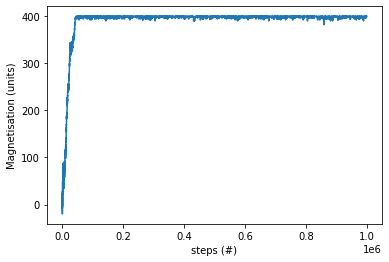

In [108]:
from matplotlib import pyplot as plt

# plotting
# YOUR CODE HERE
n = int(1e6)
j = 1
kbt = 1
#for kbt in [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]:
#    array = np.random.choice([-1, 1], size=(20, 20))
#    magnetisation = monte_carlo(array, n, j, kbt)
#    plt.plot(magnetisation, label=f'kbt={kbt}')
#plt.legend()
array = np.random.choice([-1, 1], size=(20, 20))
magnetisation = monte_carlo(array, n, j, kbt)
plt.plot(magnetisation)
#raise NotImplementedError()
plt.xlabel('steps (#)')
plt.ylabel('Magnetisation (units)')

(d) Run your program several times, in the previous cell itself, and observe the sign of the
  magnetization that develops, positive or negative.  Describe what you
  find and give a brief explanation of what is happening.

### Solution (Double click to edit)

The magnetisation tends towards a negative or a positive value, or sometimes it stays around zero. Which direction the magnetisation ends up going seems to be random. This behaviour seems to be dependent on the value of $k_{b}T$ so that the higher the value, more likely the magnetisation is to stay around zero. With value of $k_bT$ around 1, spontaneous magnetisation can be observed, but with values closer to 10, it does not happen. This might be explained by the Curie temperature, above which spontaneous magnetisation does not happen. The Curie temperature is material dependent, and for the material that the Ising model describes, the Curie temperature seems to be around 10/$k_B$.